<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [72]:
import pandas as pd

import sys
sys.path.append('../../connectTCR')
from connectTCR.io import *
from connectTCR.signal import *

import seaborn as sns
import matplotlib.pyplot as plt

outdir = '../output/timeseries/'

df_csf, t_csf = read_timeseries(outdir, 'csf', meta_ext='.meta.v3.csv')
df_csf_tidy = tidy_timeseries(df_csf)
print(df_csf_tidy.head())

test = df_csf_tidy.loc[df_csf_tidy.kmeans.isin(['1','2'])]
print(test.shape)
signal_tidy = df_csf_tidy.loc[df_csf_tidy.frequency_type=='signal']

                 TRB  kmeans  kshape frequency_type Timepoint  Frequency
0      CASRRGSGNTIYF       3       3         signal     C09D2   0.001733
1     CASSFSGISYEQYF       3       3         signal     C09D2   0.001624
2       CASRASKGKAFF       3       3         signal     C09D2   0.001624
3       CSANRGNTEAFF       3       3         signal     C09D2   0.001624
4  CASSKGSGAGGNQPQHF       3       3         signal     C09D2   0.001408
(7447, 6)


In [76]:
df_csf_tidy['Timepoint'].nunique()

11

In [73]:
nnz = signal_tidy.loc[signal_tidy['Frequency']!=0]
n_obs = nnz.groupby(['kmeans', 'kshape','TRB']).size().to_frame()
n_obs.columns = ['n_obs']
n_obs = n_obs.reset_index()

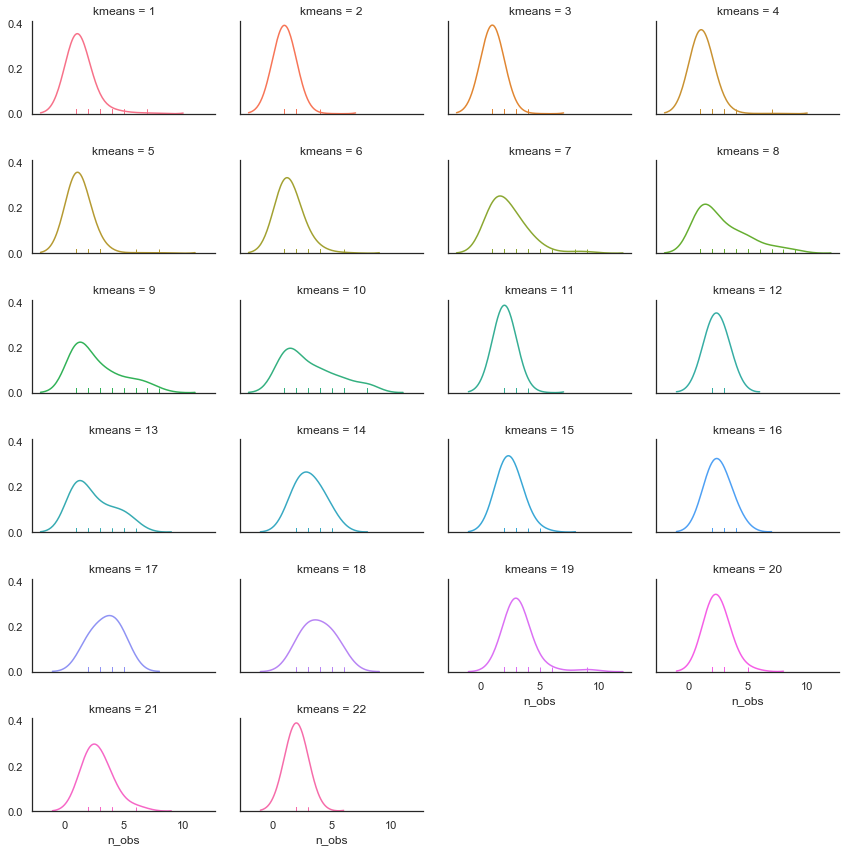

In [74]:
g = sns.FacetGrid(n_obs, col='kmeans', col_wrap=4, 
    hue='kmeans',
    height=2, aspect=1.5, sharey=True, )

import numpy as np
bins = np.arange(0, 8, 1)
#g = g.map(plt.hist, 0, bins=bins, norm=True)
g.map(sns.distplot, 'n_obs', hist=False, rug=True, kde_kws={'bw':1})

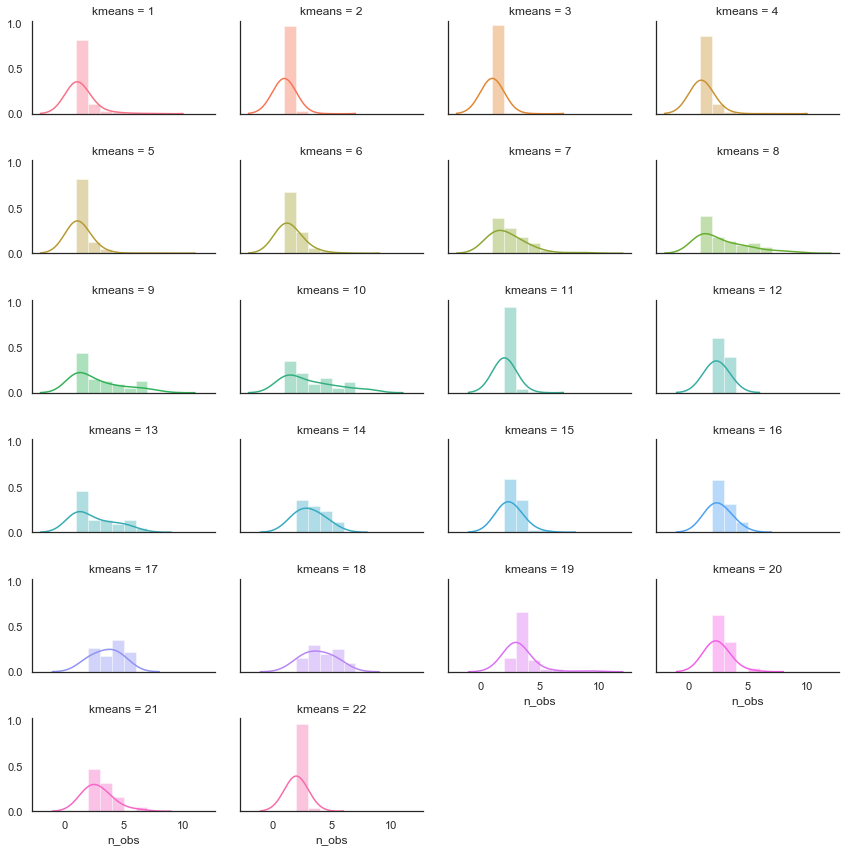

In [75]:
g = sns.FacetGrid(n_obs, col='kmeans', col_wrap=4, 
    hue='kmeans',
    height=2, aspect=1.5, sharey=True, )

import numpy as np
bins = np.arange(0, 8, 1)
#g = g.map(plt.hist, 0, bins=bins, norm=True)
g.map(sns.distplot, "n_obs", hist=True, kde=True, bins=bins, kde_kws={'bw':1})

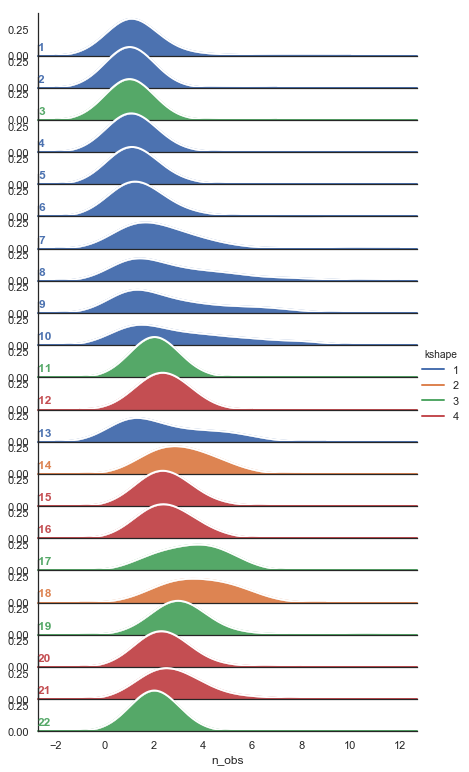

In [77]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(n_obs, row='kmeans', 
    hue='kshape',
    height=0.5, aspect=12, sharey=True, )

import numpy as np
bins = np.arange(0, 8, 1)
#g = g.map(plt.hist, 0, bins=bins, norm=True)
g.map(sns.kdeplot, "n_obs", clip_on=False, shade=True, alpha=1, lw=1.5, bw=1)
g.map(sns.kdeplot, "n_obs", clip_on=False, color="w", lw=2, bw=1)
# g.map(sns.kdeplot, "n_obs",  bw=1, clip_on=False)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label, **kwargs):
    data = kwargs.pop('data')
    ax = plt.gca()
    ax.text(0, .2, data['kmeans'].values[0], fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map_dataframe(label, "n_obs")
g.set_titles("")
g.add_legend()
g.fig.subplots_adjust(hspace=-.25)


In [78]:
nnz = signal_tidy.loc[signal_tidy['Frequency']!=0]
n_obs = nnz.groupby(['kshape','TRB']).size().to_frame()
n_obs.columns = ['n_obs']
n_obs = n_obs.reset_index()

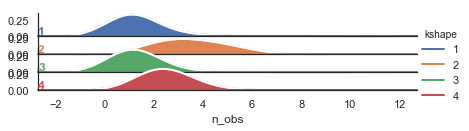

In [80]:
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
g = sns.FacetGrid(n_obs, row='kshape', 
    hue='kshape',
    height=0.5, aspect=12, sharey=True, )

import numpy as np
bins = np.arange(0, 8, 1)
#g = g.map(plt.hist, 0, bins=bins, norm=True)
g.map(sns.kdeplot, "n_obs", clip_on=False, shade=True, alpha=1, lw=1.5, bw=1)
g.map(sns.kdeplot, "n_obs", clip_on=False, color="w", lw=2, bw=1)
# g.map(sns.kdeplot, "n_obs",  bw=1, clip_on=False)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label, **kwargs):
    data = kwargs.pop('data')
    ax = plt.gca()
    ax.text(0, .2, data['kshape'].values[0], fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)
g.map_dataframe(label, "n_obs")
g.set_titles("")
g.add_legend()
g.fig.subplots_adjust(hspace=-.25)
